# Import Python Packages & Libraries

In [1]:
import geopandas as gpd
import matplotlib.colors as colors
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
from astropy.modeling import models, fitting
from scipy import stats
import statsmodels.api as sm
import pylab as py
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from IPython.display import display_html 
from shapely.geometry import Point, Polygon

class BOLD:
   B_start = '\033[1m'
   B_end = '\033[0m'
class UNDERLINE:
    U_start = '\033[4m'
    U_end = '\033[0m'

# Sulfur Dioxide (SO2) 

### Line Plots (2016, 2017, 2018)

Bronx     365
Queens    365
Name: COUNTY, dtype: int64


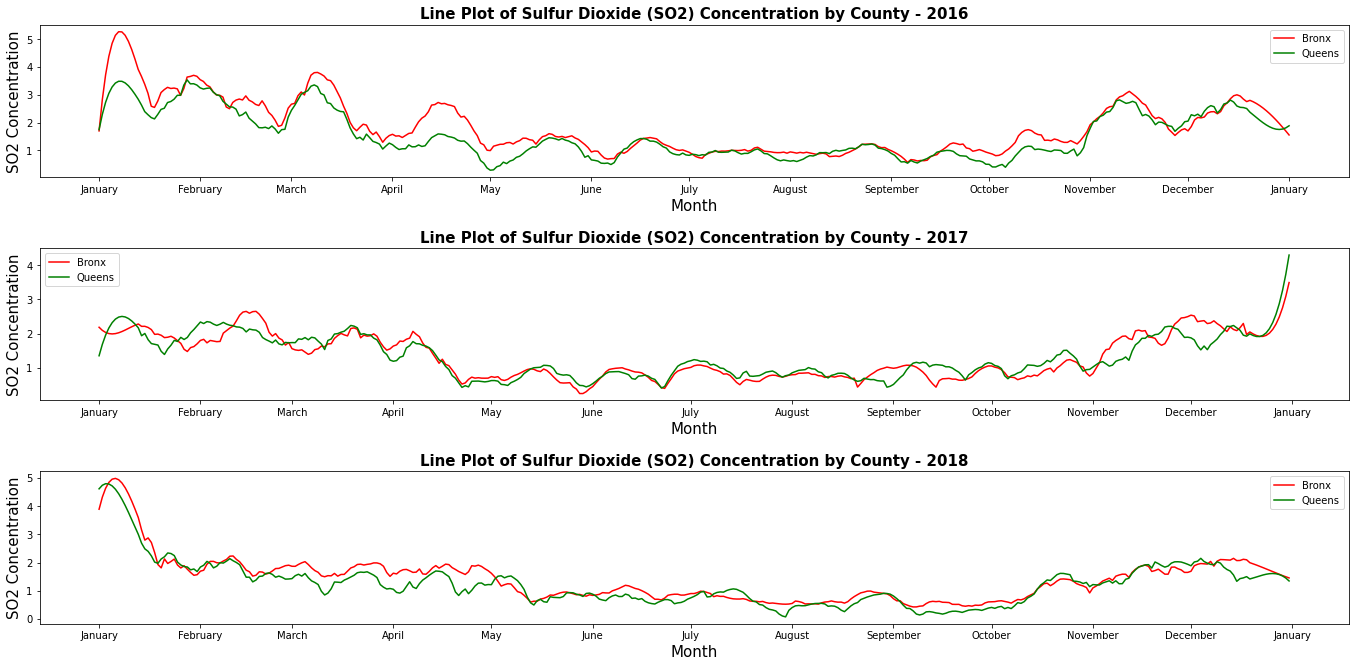

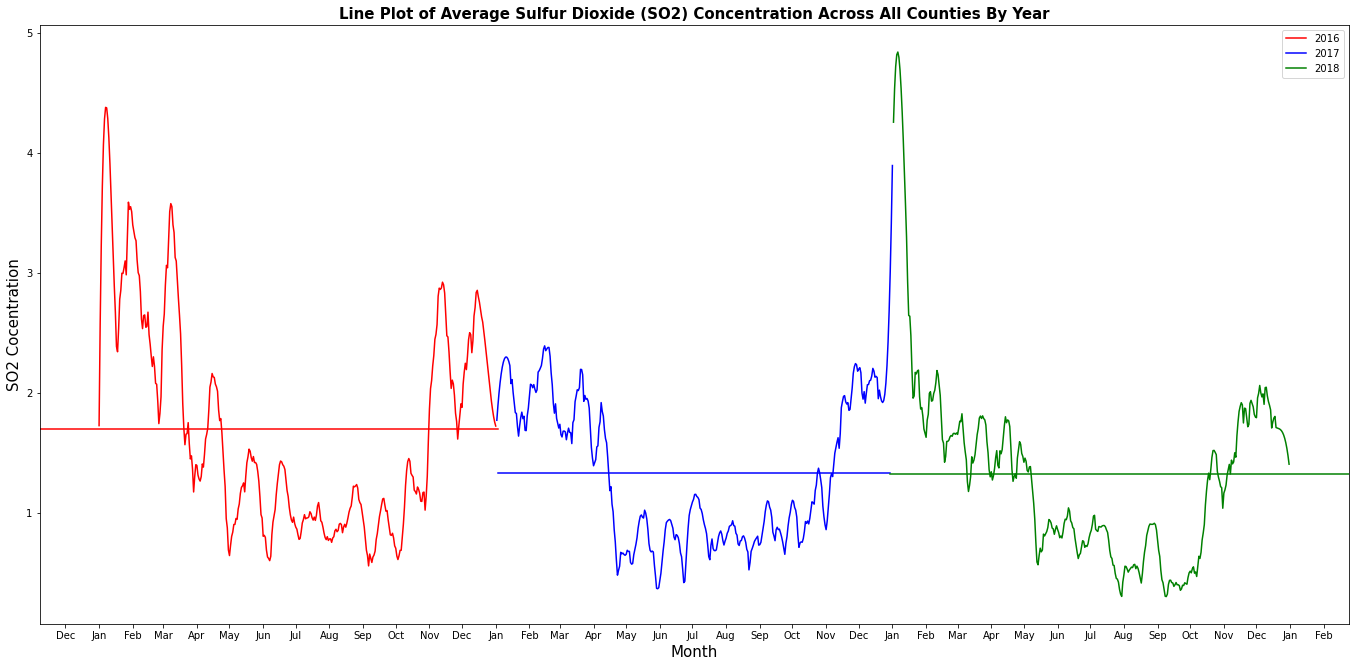

In [2]:
SO2_2016 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/SO2/SO2.2016.All_Sites_NEW.csv")
SO2_2017 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/SO2/SO2.2017.All_Sites_NEW.csv")
SO2_2018 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/SO2/SO2.2018.All_Sites_NEW.csv")

print(SO2_2017["COUNTY"].value_counts())

# Bronx SO2 (2016, 2017, 2018)
BRONX_SO2_2016 = SO2_2016[SO2_2016["COUNTY"] == "Bronx"]
BRONX_SO2_2017 = SO2_2017[SO2_2017["COUNTY"] == "Bronx"]
BRONX_SO2_2018 = SO2_2018[SO2_2018["COUNTY"] == "Bronx"]

BRONX_COMBINED = pd.DataFrame()
BRONX_COMBINED = pd.concat([BRONX_SO2_2016.reset_index(drop = True, inplace = False),
                BRONX_SO2_2017.reset_index(drop = True, inplace = False),
                BRONX_SO2_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Queens SO2 (2016, 2017, 2018)
QUEENS_SO2_2016 = SO2_2016[SO2_2016["COUNTY"] == "Queens"]
QUEENS_SO2_2017 = SO2_2017[SO2_2017["COUNTY"] == "Queens"]
QUEENS_SO2_2018 = SO2_2018[SO2_2018["COUNTY"] == "Queens"]

QUEENS_COMBINED = pd.DataFrame()
QUEENS_COMBINED = pd.concat([QUEENS_SO2_2016.reset_index(drop = True, inplace = False),
                QUEENS_SO2_2017.reset_index(drop = True, inplace = False),
                QUEENS_SO2_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

SO2_2016_MEAN = SO2_2016.groupby(SO2_2016["DATE"])["AQI_CONC"].mean()
SO2_2017_MEAN = SO2_2017.groupby(SO2_2017["DATE"])["AQI_CONC"].mean()
SO2_2018_MEAN = SO2_2018.groupby(SO2_2018["DATE"])["AQI_CONC"].mean()

# Line Plot Overlaying Each County for Sulfur Dioxide (SO2) in 2016
fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["Bronx","Queens"]

# 2016
smoothed = savgol_filter(BRONX_SO2_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(BRONX_SO2_2016["DATE"], smoothed, color = "red")
smoothed = savgol_filter(QUEENS_SO2_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(QUEENS_SO2_2016["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax1.set_title("Line Plot of Sulfur Dioxide (SO2) Concentration by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("SO2 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)

# 2017
smoothed = savgol_filter(BRONX_SO2_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(BRONX_SO2_2017["DATE"], smoothed, color = "red")
smoothed = savgol_filter(QUEENS_SO2_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(QUEENS_SO2_2017["DATE"], smoothed, color = "green")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax2.set_title("Line Plot of Sulfur Dioxide (SO2) Concentration by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("SO2 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
ax2.legend(labels = legend_labels)

# 2018
smoothed = savgol_filter(BRONX_SO2_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(BRONX_SO2_2018["DATE"], smoothed, color = "red")
smoothed = savgol_filter(QUEENS_SO2_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(QUEENS_SO2_2018["DATE"], smoothed, color = "green")
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax3.set_title("Line Plot of Sulfur Dioxide (SO2) Concentration by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("SO2 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
ax3.legend(labels = legend_labels)
plt.show()

# Averaged By Year (2016, 2017, 2018)
SO2_2016_MEAN = SO2_2016.groupby(SO2_2016["DATE"])["AQI_CONC"].mean().reset_index()
SO2_2017_MEAN = SO2_2017.groupby(SO2_2017["DATE"])["AQI_CONC"].mean().reset_index()
SO2_2018_MEAN = SO2_2018.groupby(SO2_2018["DATE"])["AQI_CONC"].mean().reset_index()

# Averaged By Year (2016, 2017, 2018)
fig, ax1  = plt.subplots(1, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["2016","2017","2018"]

# Averaged By Year (2016, 2017, 2018)
smoothed = savgol_filter(SO2_2016_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(SO2_2016_MEAN["DATE"], smoothed, color = "red")
smoothed = savgol_filter(SO2_2017_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(SO2_2017_MEAN["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(SO2_2018_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(SO2_2018_MEAN["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.set_title("Line Plot of Average Sulfur Dioxide (SO2) Concentration Across All Counties By Year", fontweight = "bold", size = 15)
ax1.set_ylabel("SO2 Cocentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)
ax1.axhline(y = SO2_2016_MEAN["AQI_CONC"].mean(), color = "red", linestyle = '-', xmax = 0.35)
ax1.axhline(y = SO2_2017_MEAN["AQI_CONC"].mean(), color = "blue", linestyle = '-', xmin = 0.35, xmax = 0.65)
ax1.axhline(y = SO2_2018_MEAN["AQI_CONC"].mean(), color = "green", linestyle = '-', xmin = 0.65, xmax = 1)

plt.show()

### Descriptive Statistics

In [3]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Sulfur Dioxide (SO2); Bronx"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(BRONX_SO2_2016["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_SO2_2017["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_SO2_2018["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_COMBINED["AQI_CONC"].describe())], 
                     ["Bronx - 2016",
                      "Bronx - 2017",
                      "Bronx - 2018",
                      "Bronx - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Sulfur Dioxide (SO2); Queens"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(QUEENS_SO2_2016["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_SO2_2017["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_SO2_2018["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_COMBINED["AQI_CONC"].describe())], 
                     ["Queens - 2016",
                      "Queens - 2017",
                      "Queens - 2018",
                      "Queens - Combined"])

Descriptive Stats - Sulfur Dioxide (SO2); Bronx


,AQI_CONC
count,366.000000
mean,1.854372
std,1.412962
min,0.000000
25%,0.900000
50%,1.500000
75%,2.300000
max,10.200000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - Sulfur Dioxide (SO2); Queens


,AQI_CONC
count,366.000000
mean,1.546721
std,1.333192
min,0.000000
25%,0.600000
50%,1.200000
75%,2.175000
max,9.000000
,AQI_CONC
count,365.000000


### Box Plots (2016, 2017, 2018)

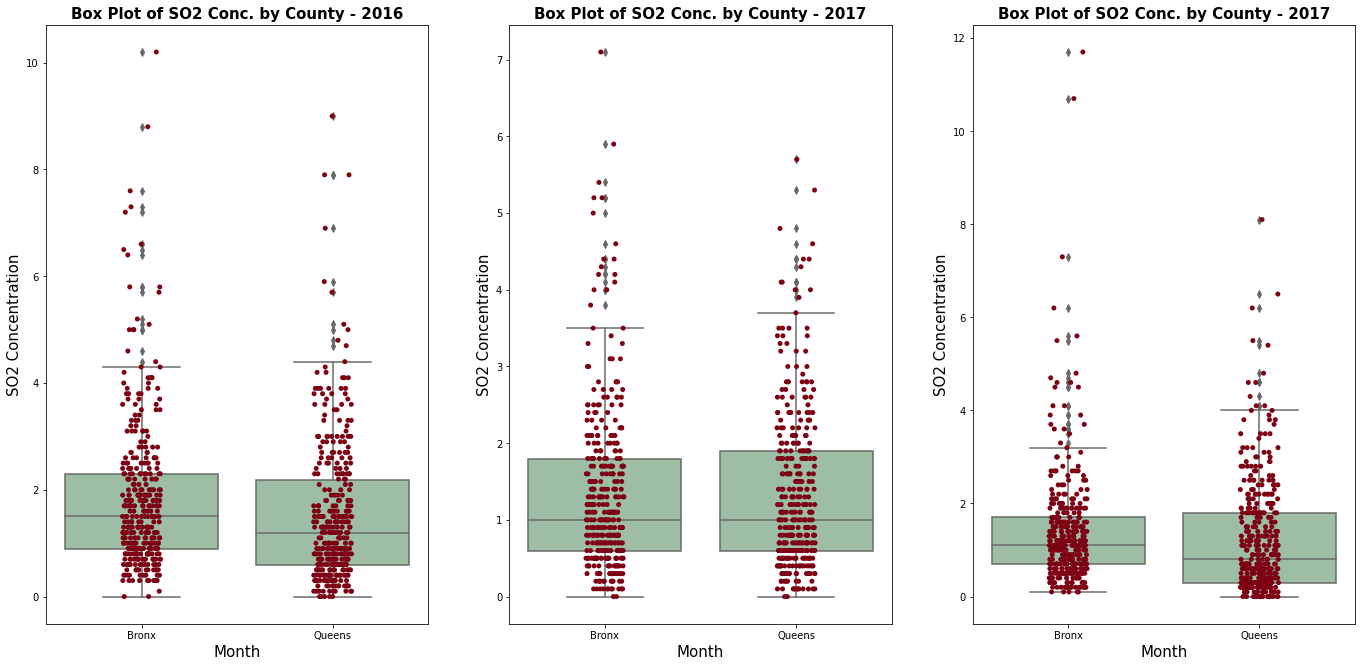

_________________________________________________________________________________


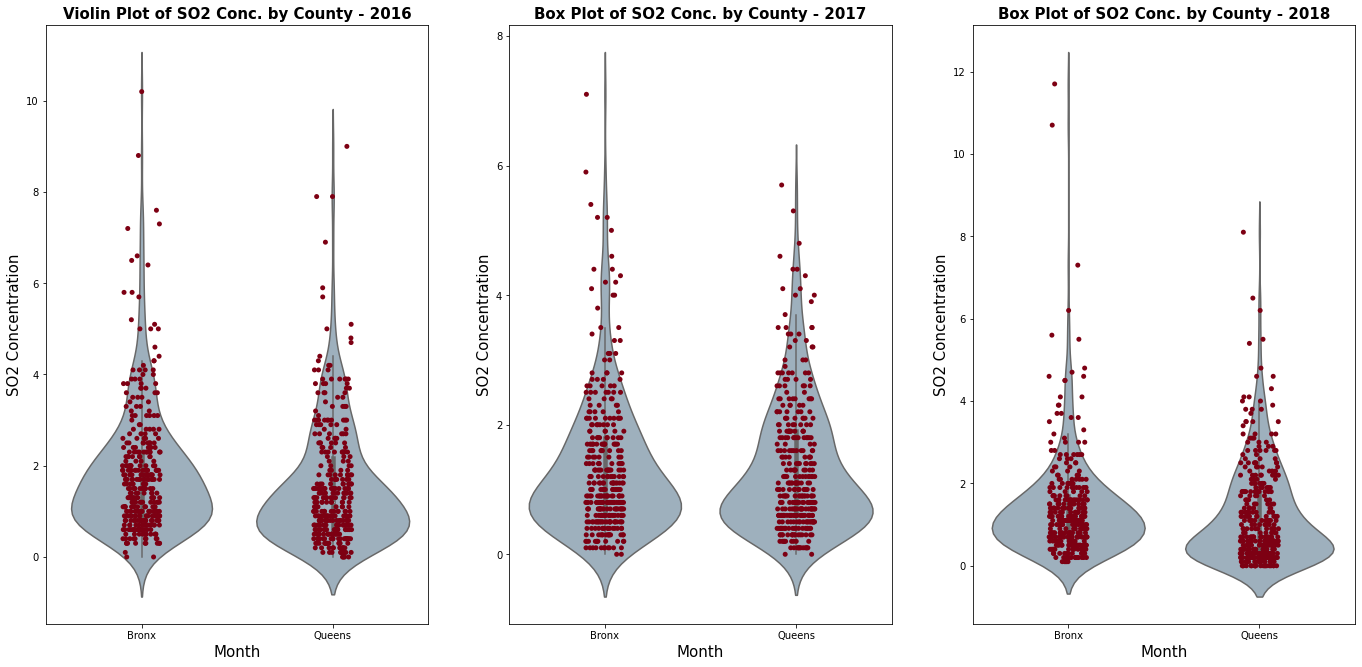

In [4]:
# Box Plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2016, color = "#99c2a2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Box Plot of SO2 Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("SO2 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2017, color = "#99c2a2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of SO2 Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("SO2 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2018, color = "#99c2a2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of SO2 Conc. by County - 2017", fontweight = "bold", size = 15)
ax3.set_ylabel("SO2 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# Violin Plots

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2016, color = "#99b1c2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Violin Plot of SO2 Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("SO2 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2017, color = "#99b1c2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of SO2 Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("SO2 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2018, color = "#99b1c2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = SO2_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of SO2 Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("SO2 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()

### T-Tests & ANOVA Tests (2016, 2017, 2018)

In [5]:
# T-Test comparison by variables
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Sulfur Dioxide (SO2) 2016"+UNDERLINE.U_end+BOLD.B_end)
print("Queens vs. Bronx - Sulfur Dioxide 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_SO2_2016["AQI_CONC"],BRONX_SO2_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Sulfur Dioxide (SO2) 2016"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([QUEENS_SO2_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                     BRONX_SO2_2016["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"Queens",1:"Bronx"})
moore_lm = ols("""Bronx ~ Queens + Bronx:Queens""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Sulfur Dioxide (SO2) 2017"+UNDERLINE.U_end+BOLD.B_end)
print("Queens vs. Bronx - Sulfur Dioxide 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_SO2_2017["AQI_CONC"],BRONX_SO2_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Sulfur Dioxide (SO2) 2017"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([QUEENS_SO2_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                      BRONX_SO2_2017["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"Queens",1:"Bronx"})
moore_lm = ols("""Bronx ~ Queens + Bronx:Queens""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Sulfur Dioxide (SO2) 2018"+UNDERLINE.U_end+BOLD.B_end)
print("Queens vs. Bronx - Sulfur Dioxide 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_SO2_2018["AQI_CONC"],BRONX_SO2_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Sulfur Dioxide (SO2) 2018"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([QUEENS_SO2_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                      BRONX_SO2_2018["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"Queens",1:"Bronx"})
moore_lm = ols("""Bronx ~ Queens + Bronx:Queens""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Sulfur Dioxide (SO2) All Years"+UNDERLINE.U_end+BOLD.B_end)
print("2016 vs. 2017 - Sulfur Dioxide (SO2)")
fvalue, pvalue = stats.ttest_ind(SO2_2016_MEAN["AQI_CONC"],SO2_2017_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2016 vs. 2018 - Sulfur Dioxide (SO2)")
fvalue, pvalue = stats.ttest_ind(SO2_2016_MEAN["AQI_CONC"],SO2_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2017 vs. 2018 - Sulfur Dioxide (SO2)")
fvalue, pvalue = stats.ttest_ind(SO2_2017_MEAN["AQI_CONC"],SO2_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

T-Test - Sulfur Dioxide (SO2) 2016
Queens vs. Bronx - Sulfur Dioxide 2016
t-Value: -3.0297 p-Value: 0.002534063946740892


ANOVA - Sulfur Dioxide (SO2) 2016
                  sum_sq     df           F        PR(>F)
Queens        339.111200    1.0  561.621897  1.070870e-75
Bronx:Queens  170.414886    1.0  282.234062  2.877991e-47
Residual      219.181920  363.0         NaN           NaN
_________________________________________________________________________________


T-Test - Sulfur Dioxide (SO2) 2017
Queens vs. Bronx - Sulfur Dioxide 2017
t-Value: 0.032 p-Value: 0.9744713963750112


ANOVA - Sulfur Dioxide (SO2) 2017
                  sum_sq     df           F        PR(>F)
Queens        135.547453    1.0  465.361710  5.884310e-67
Bronx:Queens  169.600479    1.0  582.272608  2.291691e-77
Residual      105.440944  362.0         NaN           NaN
_________________________________________________________________________________


T-Test - Sulfur Dioxide (SO2) 2018
Queens vs. Bronx - Sulf

### Histograms w/Curve Fitting (2016, 2017, 2018)

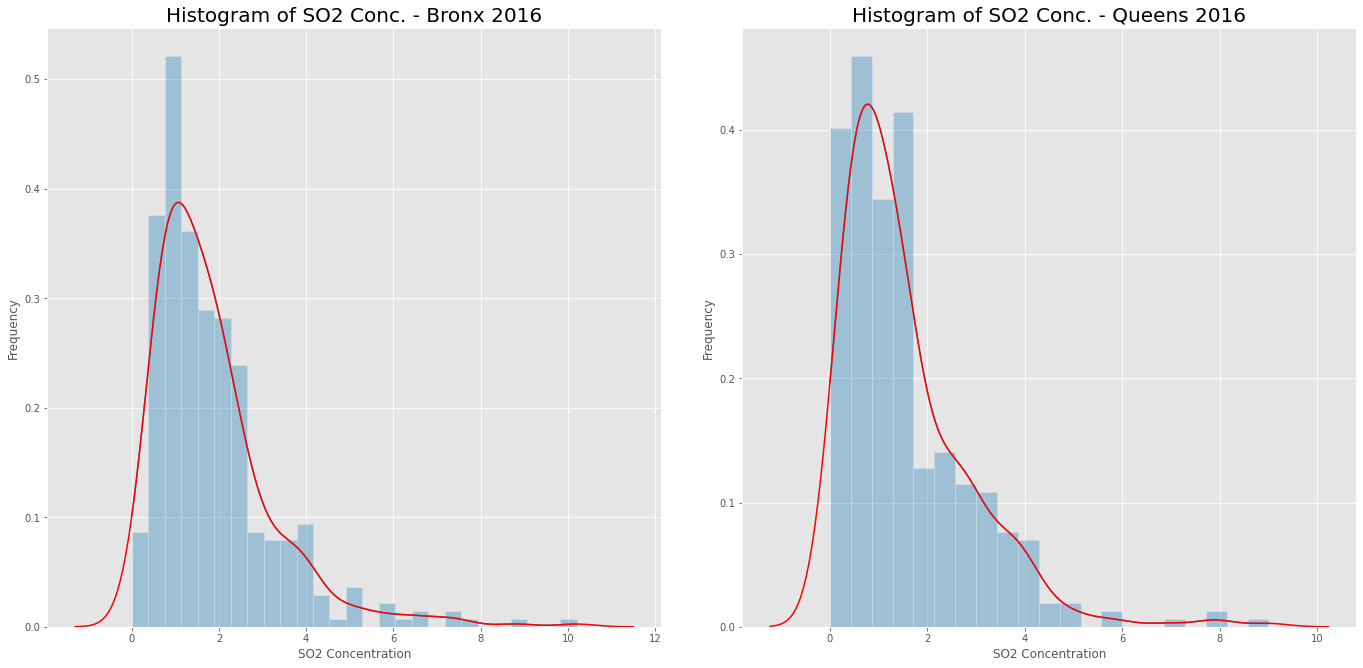

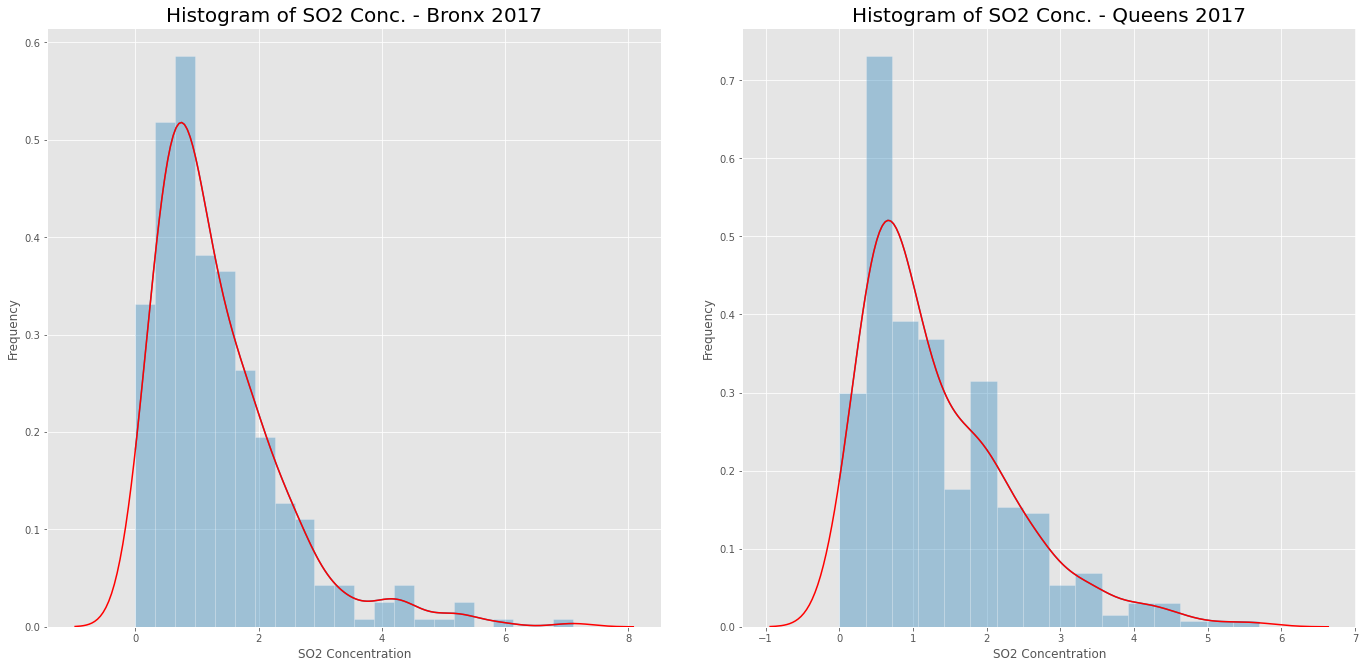

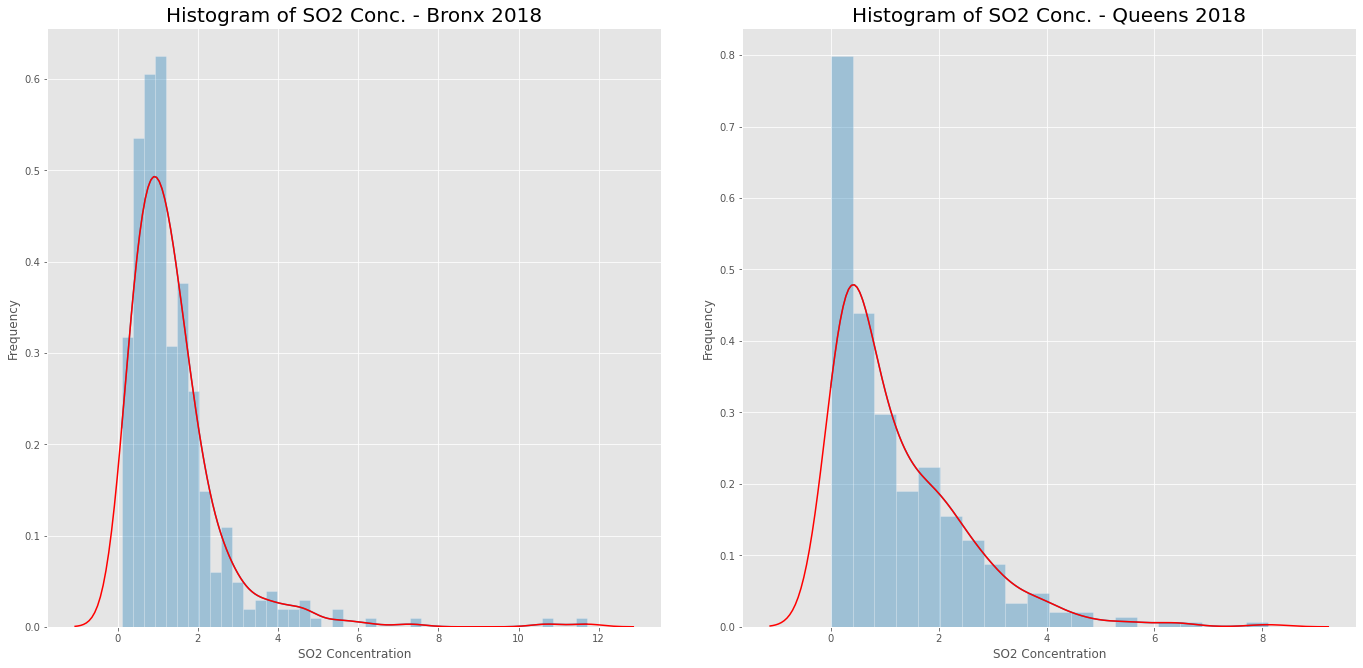



Shapiro-Wilk Test for Normality


,AQI,County,Year,Statistic,p-Value
0,SO4,Bronx,2016,0.824084,1.066870e-19
1,SO4,Queens,2016,0.838005,6.211231e-19
2,SO4,Bronx,2017,0.846340,2.000727e-18
3,SO4,Queens,2017,0.888729,1.246298e-15
4,SO4,Bronx,2018,0.703575,6.872848e-25
5,SO4,Queens,2018,0.840646,9.342600e-19


D’Agostino and Pearson Test for Normality


,AQI,County,Year,Statistic,p-Value
0,SO4,Bronx,2016,176.989375,3.691862e-39
1,SO4,Queens,2016,156.875315,8.609106e-35
2,SO4,Bronx,2017,146.278940,1.721598e-32
3,SO4,Queens,2017,84.045010,5.621574e-19
4,SO4,Bronx,2018,319.937977,3.360090e-70
5,SO4,Queens,2018,136.507207,2.279485e-30


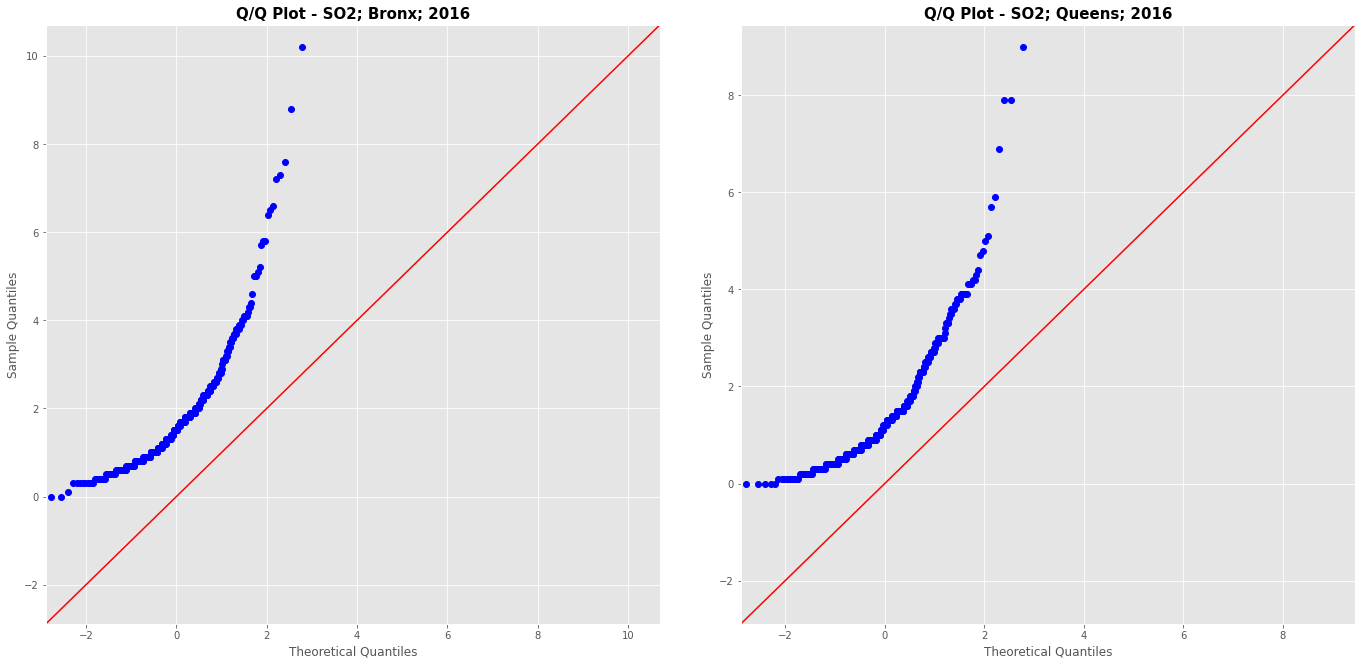

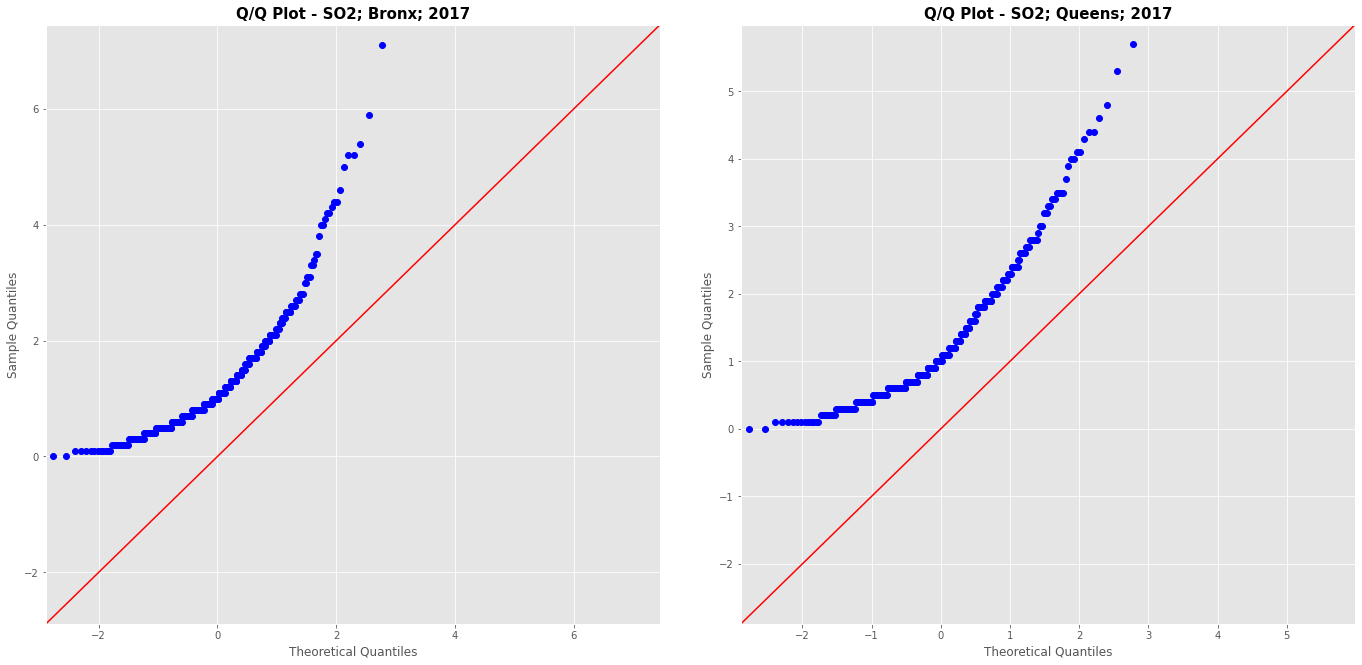

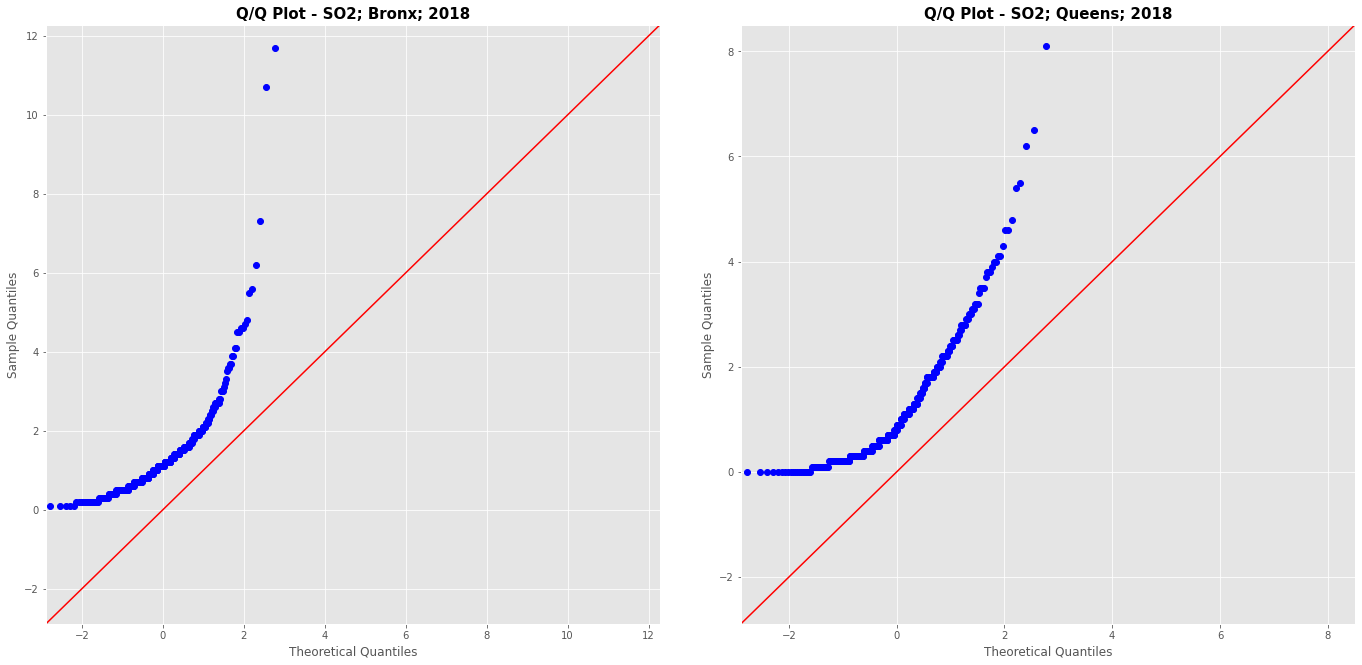

In [6]:
# 2016
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Sulfur Dioxide (SO2) Concentration for Bronx County w/Curve Fit - 2016"
sns.histplot(BRONX_SO2_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_SO2_2016, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("SO2 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of SO2 Conc. - Bronx 2016", fontsize = 20)

# "Histogram of Sulfur Dioxide (SO2) Concentration for Queens County w/Curve Fit - 2016"
sns.histplot(QUEENS_SO2_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = QUEENS_SO2_2016, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("SO2 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of SO2 Conc. - Queens 2016", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2017
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Sulfur Dioxide (SO2) Concentration for Bronx County w/Curve Fit - 2017"
sns.histplot(BRONX_SO2_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_SO2_2017, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("SO2 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of SO2 Conc. - Bronx 2017", fontsize = 20)

# "Histogram of Sulfur Dioxide (SO2) Concentration for Queens County w/Curve Fit - 2017"
sns.histplot(QUEENS_SO2_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = QUEENS_SO2_2017, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("SO2 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of SO2 Conc. - Queens 2017", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2018
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Sulfur Dioxide (SO2) Concentration for Bronx County w/Curve Fit - 2018"
sns.histplot(BRONX_SO2_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_SO2_2018, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("SO2 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of SO2 Conc. - Bronx 2018", fontsize = 20)

# "Histogram of Sulfur Dioxide (SO2) Concentration for Queens County w/Curve Fit - 2018"
sns.histplot(QUEENS_SO2_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = QUEENS_SO2_2018, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("SO2 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of SO2 Conc. - Queens 2018", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# H0 = Data was pulled from a normal distribution
# HT = Data was NOT pulled from a normal distribution
# The Shapiro-Wilk test rejects the null hypothesis of normality when the p-value is less than or equal to 0.05

shapiro_df = pd.DataFrame({})
print(BOLD.B_start+UNDERLINE.U_start+"Shapiro-Wilk Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
shapiro_df = shapiro_df.append([{"AQI":"SO4","County":"Bronx","Year":2016,"Statistic":stats.shapiro(BRONX_SO2_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_SO2_2016["AQI_CONC"]).pvalue},
                {"AQI":"SO4","County":"Queens","Year":2016,"Statistic":stats.shapiro(QUEENS_SO2_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_SO2_2016["AQI_CONC"]).pvalue},
                {"AQI":"SO4","County":"Bronx","Year":2017,"Statistic":stats.shapiro(BRONX_SO2_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_SO2_2017["AQI_CONC"]).pvalue},
                {"AQI":"SO4","County":"Queens","Year":2017,"Statistic":stats.shapiro(QUEENS_SO2_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_SO2_2017["AQI_CONC"]).pvalue},
                {"AQI":"SO4","County":"Bronx","Year":2018,"Statistic":stats.shapiro(BRONX_SO2_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_SO2_2018["AQI_CONC"]).pvalue},
                {"AQI":"SO4","County":"Queens","Year":2018,"Statistic":stats.shapiro(QUEENS_SO2_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_SO2_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(shapiro_df)

###############################################################################################################

# D’Agostino and Pearson Test for Normality
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

normality_df = pd.DataFrame()
print(BOLD.B_start+UNDERLINE.U_start+"D’Agostino and Pearson Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
normality_df = normality_df.append([{"AQI":"SO4","County":"Bronx","Year":2016,"Statistic":stats.normaltest(BRONX_SO2_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_SO2_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"SO4","County":"Queens","Year":2016,"Statistic":stats.normaltest(QUEENS_SO2_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_SO2_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"SO4","County":"Bronx","Year":2017,"Statistic":stats.normaltest(BRONX_SO2_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_SO2_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"SO4","County":"Queens","Year":2017,"Statistic":stats.normaltest(QUEENS_SO2_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_SO2_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"SO4","County":"Bronx","Year":2018,"Statistic":stats.normaltest(BRONX_SO2_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_SO2_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"SO4","County":"Queens","Year":2018,"Statistic":stats.normaltest(QUEENS_SO2_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_SO2_2018["AQI_CONC"]).pvalue}])
display(normality_df)
print("\n")
###############################################################################################################

# Q/Q Plot
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

#2016
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_SO2_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - SO2; Bronx; 2016", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_SO2_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - SO2; Queens; 2016", fontweight = "bold", size = 15)

#2017
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_SO2_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - SO2; Bronx; 2017", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_SO2_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - SO2; Queens; 2017", fontweight = "bold", size = 15)

#2018
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_SO2_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - SO2; Bronx; 2018", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_SO2_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - SO2; Queens; 2018", fontweight = "bold", size = 15)
plt.show()

### Min & Max Values & Dates 

In [7]:
# 2016 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum Sulfur Dioxide (SO2) Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_SO2_2016_MIN = BRONX_SO2_2016[BRONX_SO2_2016["AQI_CONC"] == BRONX_SO2_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_SO2_2016_MIN = BRONX_SO2_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_SO2_2016_MIN)
QUEENS_SO2_2016_MIN = QUEENS_SO2_2016[QUEENS_SO2_2016["AQI_CONC"] == QUEENS_SO2_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_SO2_2016_MIN = QUEENS_SO2_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_SO2_2016_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2016 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum Sulfur Dioxide (SO2) Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_SO2_2016_MAX = BRONX_SO2_2016[BRONX_SO2_2016["AQI_CONC"] == BRONX_SO2_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_SO2_2016_MAX = BRONX_SO2_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_SO2_2016_MAX)
QUEENS_SO2_2016_MAX = QUEENS_SO2_2016[QUEENS_SO2_2016["AQI_CONC"] == QUEENS_SO2_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_SO2_2016_MAX = QUEENS_SO2_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_SO2_2016_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum Sulfur Dioxide (SO2) Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_SO2_2017_MIN = BRONX_SO2_2017[BRONX_SO2_2017["AQI_CONC"] == BRONX_SO2_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_SO2_2017_MIN = BRONX_SO2_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_SO2_2017_MIN)
QUEENS_SO2_2017_MIN = QUEENS_SO2_2017[QUEENS_SO2_2017["AQI_CONC"] == QUEENS_SO2_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_SO2_2017_MIN = QUEENS_SO2_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_SO2_2017_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# 2017 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum Sulfur Dioxide (SO2) Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_SO2_2017_MAX = BRONX_SO2_2017[BRONX_SO2_2017["AQI_CONC"] == BRONX_SO2_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_SO2_2017_MAX = BRONX_SO2_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_SO2_2017_MAX)
QUEENS_SO2_2017_MAX = QUEENS_SO2_2017[QUEENS_SO2_2017["AQI_CONC"] == QUEENS_SO2_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_SO2_2017_MAX = QUEENS_SO2_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_SO2_2017_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# 2018 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum Sulfur Dioxide (SO2) Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_SO2_2018_MIN = BRONX_SO2_2018[BRONX_SO2_2018["AQI_CONC"] == BRONX_SO2_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_SO2_2018_MIN = BRONX_SO2_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_SO2_2018_MIN)
QUEENS_SO2_2018_MIN = QUEENS_SO2_2018[QUEENS_SO2_2018["AQI_CONC"] == QUEENS_SO2_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_SO2_2018_MIN = QUEENS_SO2_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_SO2_2018_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# 2018 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum Sulfur Dioxide (SO2) Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_SO2_2018_MAX = BRONX_SO2_2018[BRONX_SO2_2018["AQI_CONC"] == BRONX_SO2_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_SO2_2018_MAX = BRONX_SO2_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_SO2_2018_MAX)
QUEENS_SO2_2018_MAX = QUEENS_SO2_2018[QUEENS_SO2_2018["AQI_CONC"] == QUEENS_SO2_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_SO2_2018_MAX = QUEENS_SO2_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_SO2_2018_MAX)

Minimum Sulfur Dioxide (SO2) Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
273,2016-09-30,0.0,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
490,2016-05-04,0.0,ppb,Queens


_________________________________________________________________________________
Maximum Sulfur Dioxide (SO2) Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
5,2016-01-06,10.2,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
372,2016-01-07,9.0,ppb,Queens


_________________________________________________________________________________
Minimum Sulfur Dioxide (SO2) Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
144,2017-05-25,0.0,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
625,2017-09-18,0.0,ppb,Queens


_________________________________________________________________________________
Maximum Sulfur Dioxide (SO2) Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
363,2017-12-30,7.1,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
727,2017-12-29,5.7,ppb,Queens


_________________________________________________________________________________
Minimum Sulfur Dioxide (SO2) Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
138,2018-05-19,0.1,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
417,2018-02-22,0.0,ppb,Queens


_________________________________________________________________________________
Maximum Sulfur Dioxide (SO2) Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
7,2018-01-08,11.7,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
371,2018-01-07,8.1,ppb,Queens


### Geospatial Plot

In [ ]:
#display(BRONX_CO_2016.head())
ny_map = gpd.read_file('/Users/wwaynerichards/Desktop/Borough Boundaries/geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
ny_map = ny_map.astype({'boro_code':'int64'}).rename(columns = {"boro_code":"COUNTY"})
display(ny_map)

#fig, ax = plt.subplots(figsize = (15,15))
#ny_map.plot(ax = ax)
#plt.show()

CO_2016

geo_df = ny_map.merge(CO_2016, left_on = "COUNTY", how = "left")           
geo_df.head(3)



#crs = {'init':'epsg:4326'}

#geometry = [Polygon(xy) for xy in zip(BRONX_CO_2016["SITE_LONGITUDE"], BRONX_CO_2016["SITE_LATITUDE"])]
#display()

#geo_df = gpd.GeoDataFrame(BRONX_CO_2016, crs = crs, geometry = geometry)
#geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
geoplot.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Neg')
plt.legend(prop = {'size':15})
plt.show()